# Neural Networks // ANN - human brain multi layers

## - Image Recognition
## - Speech Recognition
## - Market
## - Weather Forceast

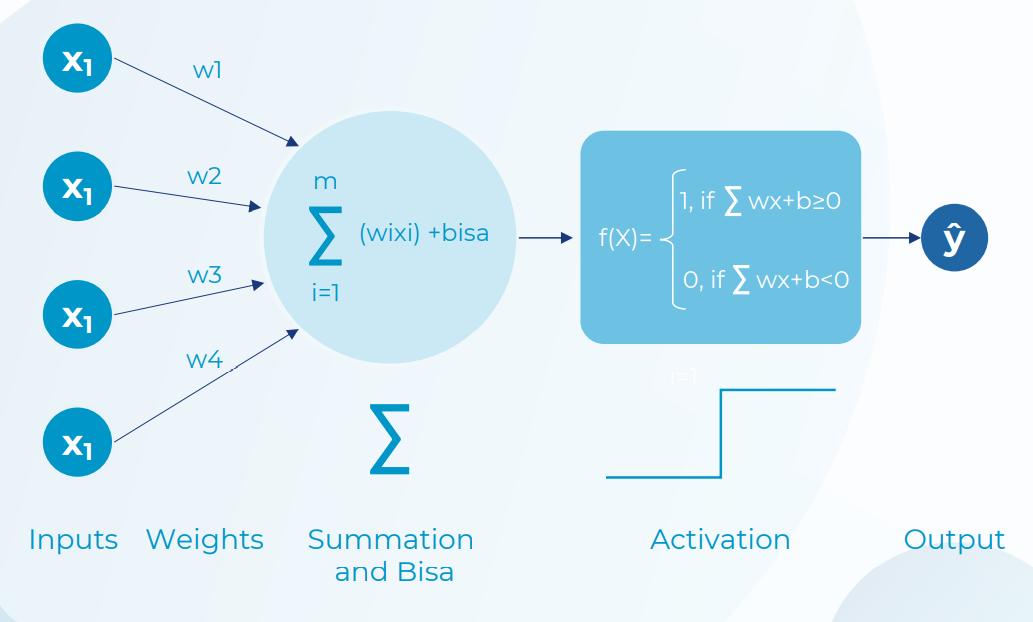



In [16]:
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split

In [17]:
X, y = fetch_openml('mnist_784', version=1, return_X_y= True, as_frame=False)
X=X/255.0

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0, test_size=0.7)

In [18]:
import pandas as pd
data= pd.DataFrame(X)
data.insert(784, 'label', y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


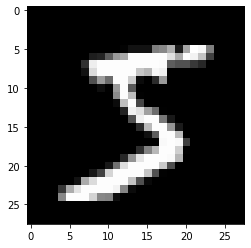

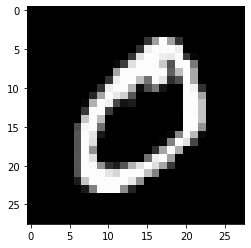

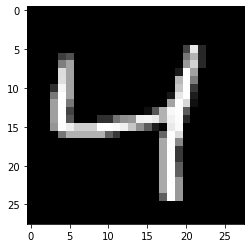

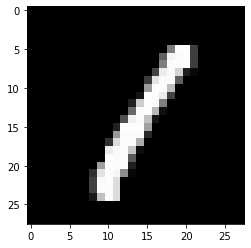

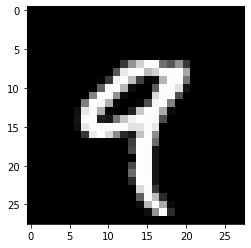

In [19]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(X[i].reshape((28,28)), cmap='gray')
  plt.show()

In [20]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=1, activation='logistic')
mlp1= MLPClassifier(hidden_layer_sizes=100, activation='logistic')
mlp2=MLPClassifier(hidden_layer_sizes=1000, activation='logistic')

In [21]:
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [22]:
predictions_NN=mlp.predict(X_test)
predictions_NN

array(['0', '7', '1', ..., '3', '2', '0'], dtype='<U1')

In [23]:
predictions_NN1=mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '8', '3', '2'], dtype='<U1')

In [24]:
predictions_NN2=mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '8', '3', '2'], dtype='<U1')

In [25]:
print(f'Actual Value: {y_test[1]}')
print(f'Predicted Value For 1 Hidden Layer: {predictions_NN[1]}')
print(f'Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}')
print(f'Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}')

Actual Value: 4
Predicted Value For 1 Hidden Layer: 7
Predicted Value For 100 Hidden Layer: 4
Predicted Value For 1000 Hidden Layer: 4


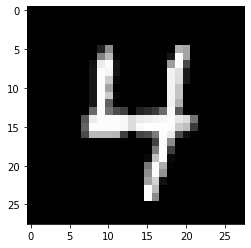

In [26]:
plt.imshow(X_test[1].reshape((28,28)), cmap='gray')
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_NN)

array([[1238,   79,   80,  272,  558,  707,    0, 1977,    0,    0],
       [   6, 4978,  423,  109,    0,   16,    0,   12,    0,    0],
       [  72, 3194,  553,  806,   21,  215,    0,   35,    0,    0],
       [ 200,  593,  747, 2494,   45,  788,    0,  119,    0,    0],
       [ 461,   25,   34,  136,  323,  257,    0, 3532,    0,    0],
       [ 559,  232,  223, 1550,  134, 1381,    0,  305,    0,    0],
       [  16, 4159,  259,  255,    7,   69,    0,   15,    0,    0],
       [ 176,   28,   41,  145,  129,  178,    0, 4375,    0,    0],
       [ 243,  479,  670, 2366,   59,  840,    0,  100,    0,    0],
       [ 268,    6,    4,   66,  205,  137,    0, 4216,    0,    0]])

In [29]:
confusion_matrix(y_test, predictions_NN1)

array([[4726,    1,   24,   11,   12,   37,   47,    6,   43,    4],
       [   0, 5423,   28,   13,    4,   23,    8,    6,   32,    7],
       [  40,   36, 4409,   70,   72,   13,   77,   60,  107,   12],
       [  33,   26,  134, 4379,    2,  172,   20,   76,   98,   46],
       [   3,   26,   32,    1, 4378,    8,   58,    8,   24,  230],
       [  62,   26,   29,  155,   55, 3804,   80,   19,  109,   45],
       [  42,   27,   45,    2,   34,   54, 4558,    2,   16,    0],
       [  19,   63,   72,   19,   66,   13,    0, 4663,    7,  150],
       [  32,  123,   46,  111,   25,  151,   42,   22, 4136,   69],
       [  42,   28,   19,   71,  154,   30,    3,  127,   35, 4393]])

In [30]:
confusion_matrix(y_test, predictions_NN2)

array([[4522,    2,   68,   33,   11,   81,  122,    2,   46,   24],
       [   0, 5347,   60,   18,    2,   39,   18,    6,   46,    8],
       [  42,   65, 4259,   96,   91,    5,  132,   75,  113,   18],
       [  20,   46,  239, 4248,    4,  107,   51,   88,   82,  101],
       [   7,   53,   33,    0, 3960,    4,   69,   21,   33,  588],
       [  59,  129,  109,  357,   93, 3210,  119,   55,  104,  149],
       [  41,   79,   94,    2,   31,   84, 4434,    2,   12,    1],
       [  28,  120,   73,   21,   60,    4,    2, 4417,   17,  330],
       [  53,  188,  188,  378,   33,  180,   44,   49, 3443,  201],
       [  45,   70,   30,   77,  152,   12,    3,  229,   42, 4242]])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_NN))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.38      0.25      0.30      4911
           1       0.36      0.90      0.52      5544
           2       0.18      0.11      0.14      4896
           3       0.30      0.50      0.38      4986
           4       0.22      0.07      0.10      4768
           5       0.30      0.32      0.31      4384
           6       0.00      0.00      0.00      4780
           7       0.30      0.86      0.44      5072
           8       0.00      0.00      0.00      4757
           9       0.00      0.00      0.00      4902

    accuracy                           0.31     49000
   macro avg       0.20      0.30      0.22     49000
weighted avg       0.21      0.31      0.22     49000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print(classification_report(y_test, predictions_NN1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4911
           1       0.94      0.98      0.96      5544
           2       0.91      0.90      0.91      4896
           3       0.91      0.88      0.89      4986
           4       0.91      0.92      0.91      4768
           5       0.88      0.87      0.88      4384
           6       0.93      0.95      0.94      4780
           7       0.93      0.92      0.93      5072
           8       0.90      0.87      0.88      4757
           9       0.89      0.90      0.89      4902

    accuracy                           0.92     49000
   macro avg       0.91      0.91      0.91     49000
weighted avg       0.92      0.92      0.92     49000



In [33]:
print(classification_report(y_test, predictions_NN2))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4911
           1       0.88      0.96      0.92      5544
           2       0.83      0.87      0.85      4896
           3       0.81      0.85      0.83      4986
           4       0.89      0.83      0.86      4768
           5       0.86      0.73      0.79      4384
           6       0.89      0.93      0.91      4780
           7       0.89      0.87      0.88      5072
           8       0.87      0.72      0.79      4757
           9       0.75      0.87      0.80      4902

    accuracy                           0.86     49000
   macro avg       0.86      0.86      0.86     49000
weighted avg       0.86      0.86      0.86     49000

